In [1]:
import adaptive
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la
from dask.distributed import Client, LocalCluster
from dask_jobqueue import PBSCluster, SLURMCluster
from scipy import sparse
from scipy.sparse import linalg as sla
from tqdm.notebook import tqdm

In [2]:
from pyusadel import (
    DifferentialOperators,
    UsadelProblem,
    gen_assemble_fun,
    solve_usadel,
    solve_usadel_self_consistent,
)

In [3]:
Nsites = 1
do = DifferentialOperators()
do.D_x = np.zeros((1, 1), dtype=float)
do.D_y = np.zeros((1, 1), dtype=float)
do.D_z = np.zeros((1, 1), dtype=float)
do.L = np.zeros((1, 1), dtype=float)

h_x = np.array([0.2])
h_y = np.array([0])
tau_sf_inv = np.array([0.1])
tau_so_inv = np.array([0])
D = 0
T = 0.2

problem = UsadelProblem(
    Nsites=1,
    diff_ops=do,
    h_x=h_x,
    h_y=h_y,
    tau_sf_inv=tau_sf_inv,
    tau_so_inv=tau_so_inv,
    D=D,
    T=T,
)

In [4]:
problem.Delta = np.array([1])
problem.solve_self_consistent()

  1    Max Delta: 1.099    Residual: 9.04e-02    Free energy: -8.37e-01
  2    Max Delta: 1.190    Residual: 7.64e-02    Free energy: -9.23e-01
  3    Max Delta: 1.272    Residual: 6.38e-02    Free energy: -9.93e-01
  4    Max Delta: 1.343    Residual: 5.30e-02    Free energy: -1.05e+00
  5    Max Delta: 1.404    Residual: 4.37e-02    Free energy: -1.09e+00
  6    Max Delta: 1.456    Residual: 3.59e-02    Free energy: -1.12e+00
  7    Max Delta: 1.500    Residual: 2.94e-02    Free energy: -1.14e+00
  8    Max Delta: 1.537    Residual: 2.40e-02    Free energy: -1.15e+00
  9    Max Delta: 1.568    Residual: 1.95e-02    Free energy: -1.16e+00
 10    Max Delta: 1.593    Residual: 1.59e-02    Free energy: -1.17e+00
 11    Max Delta: 1.614    Residual: 1.29e-02    Free energy: -1.17e+00
 12    Max Delta: 1.631    Residual: 1.04e-02    Free energy: -1.18e+00
 13    Max Delta: 1.645    Residual: 8.44e-03    Free energy: -1.18e+00
 14    Max Delta: 1.656    Residual: 6.82e-03    Free energy: -1

In [8]:
problem.set_real_omega_ax(-2, 2, 30)
problem.solve_spectral()

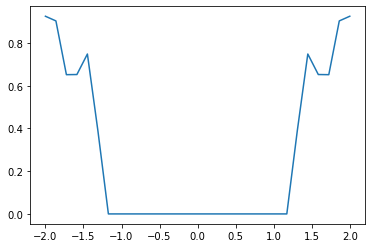

In [9]:
plt.plot(problem.get_omega_ax_r(), 
         problem.get_dos())

In [ ]:
Nx = 400
x = np.linspace(-10, 10, Nx)
dx = x[1] - x[0]

h_x = np.zeros((Nx), dtype=float)
h_y = np.zeros((Nx), dtype=float)

# h_x[: Nx // 2] = 0
# h_x[Nx // 2 :] = 2

# L_dw = 1
# h_s = 1.35
# h_x = h_s * np.tanh(x / L_dw)
# h_y = h_s * 1 / np.cosh(x / L_dw)

L_dw = 0.87
h_s = 1.4  # 35
h_x = h_s * np.cos(x / L_dw)
h_y = h_s * np.sin(x / L_dw)

In [ ]:
T_c0 = 1
Delta_00 = T_c0 * 1.7652
h_c0 = Delta_00 / np.sqrt(2)

D = 1 ** 2 * Delta_00
xi_00 = np.sqrt(D / Delta_00)

In [ ]:
tau_so_inv = 0.0
tau_sf_inv = 0.0

In [ ]:
D_x = Grad(Nx) / (2 * dx)
L = Laplacian1D(Nx, "open") / dx ** 2

# L = np.array([[0, 0], [0, 0]])
# D_x = np.array([[0, 0], [0, 0]])
# D = 0

assemble_fun = gen_assemble_fun(D, L, D_x, tau_so_inv, tau_sf_inv)

In [ ]:
fig, ax = plt.subplots()
ax.hlines([h_c0, -h_c0], -6, 6, colors="k", linestyles="--", linewidth=1)
ax.plot(x / xi_00, h_x, "-", label=r"$h_x$")
ax.plot(x / xi_00, h_y, "-", label=r"$h_y$")
ax.plot(x / xi_00, np.sqrt(h_x ** 2 + h_y ** 2), "-", label=r"$|h|$")
ax.set_xlabel(r"$x / \xi_{00}$")
ax.legend()

In [ ]:
a_ax